In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def non_markov_midprice(inital_prices, 
                        permenant_price_impact_func, 
                        nu_vals,
                        kernel_function, 
                        dt, 
                        rng,
                        num_paths,
                        num_timesteps,
                        sigma):

    final_time = num_timesteps*dt

    permenant_price_impact_vals = permenant_price_impact_func(nu_vals)
    kernel_vals = np.array([kernel_function(final_time, timestep*dt) for timestep in range(num_timesteps)])
    kernel_integrand = kernel_vals.reshape(-1,1) * permenant_price_impact_vals * dt
    kernel_integrand = np.vstack([inital_prices, kernel_integrand])
    kernel_integral = np.cumsum(kernel_integrand, axis=0)

    brownian_motion_integrand = sigma*(dt**0.5)*rng.normal(0,1, size=(num_timesteps, num_paths)) 
    zeros = np.zeros((1, num_paths))
    brownian_motion_integrand = np.vstack([zeros, brownian_motion_integrand])

    brownian_motion_integral = np.cumsum(brownian_motion_integrand, axis=0)
    prices = kernel_integral+brownian_motion_integral

    return prices

In [6]:
num_paths = 100
num_timesteps = 1000
inital_prices = np.ones((1, num_paths))
permenant_price_impact_func = lambda x: 0.00001*x
nu_vals = np.random.uniform(-10, 10,size=(num_timesteps, num_paths))
kernel_function = lambda x,y: np.exp(-(x-y)**2)
dt=1e-3
rng = np.random.default_rng(123)
sigma = 0.1

In [8]:
prices = non_markov_midprice(inital_prices=inital_prices,
                             permenant_price_impact_func=permenant_price_impact_func,
                             nu_vals=nu_vals,
                             kernel_function=kernel_function,
                             dt=dt,
                             rng=rng,
                             num_paths=num_paths,
                             num_timesteps=num_timesteps,
                             sigma=sigma)

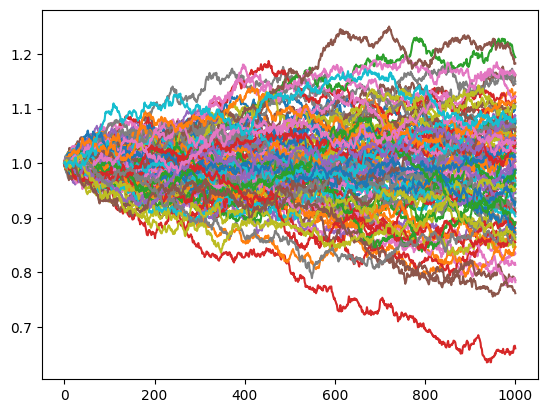

In [9]:
plt.plot(prices)
plt.show()